In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Files to load

city_data = "Resources/city_data.csv"

ride_data = "Resources/ride_data.csv"

In [6]:
# Read the city data file and store it in a pandas DF

city_df = pd.read_csv(city_data)

city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:

# Read the ride data file and store it in a pandas DF

ride_df = pd.read_csv(ride_data)

ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
# Get the columns and the rows that are not null

city_df.count()

city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [12]:
# Get the data types of each column

city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
# Get the unique values of the type of city.

city_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
# Get the number of data points from the Urban cities.

sum(city_df["type"]=="Urban")

66

In [17]:
# Get the number of data points from the Suburban cities.

sum(city_df["type"]=="Suburban")

36

In [18]:
# Get the number of data points from the Rural cities.

sum(city_df["type"]=="Rural")

18

In [20]:
# Get the columns and rows that are not null.

ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
# Get the columns and rows that are not null.

ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
# Get the data types of each column

ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [23]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# Create the Urban city DataFrame

urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
# Create the Suburban and Rural city Dataframes

suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
# Get the number of rides for urban cities

urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
# suburban and rural ride count

suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [28]:
# Get average fare for each city in the urban cities

urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [29]:
# suburban and rural fare avg

suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [30]:
# Get the avg number of drivers for each urban city

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [31]:
# avg drivers for rural and suburban cities

suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

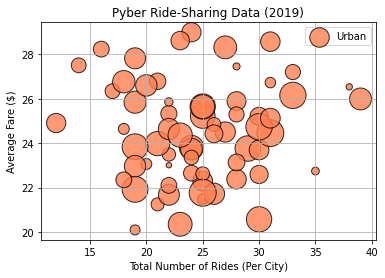

In [35]:
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "coral",
           label = "Urban")

plt.title("Pyber Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()


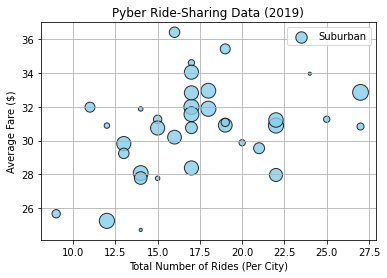

In [36]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s = 10*suburban_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "skyblue",
           label = "Suburban")

plt.title("Pyber Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()


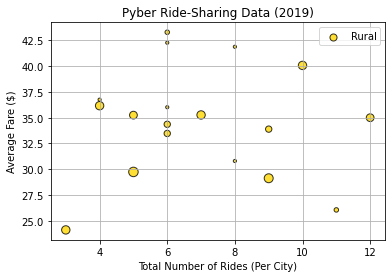

In [37]:
# Build the scatter plots for suburban cities.

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = 10*rural_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "gold",
           label = "Rural")

plt.title("Pyber Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()

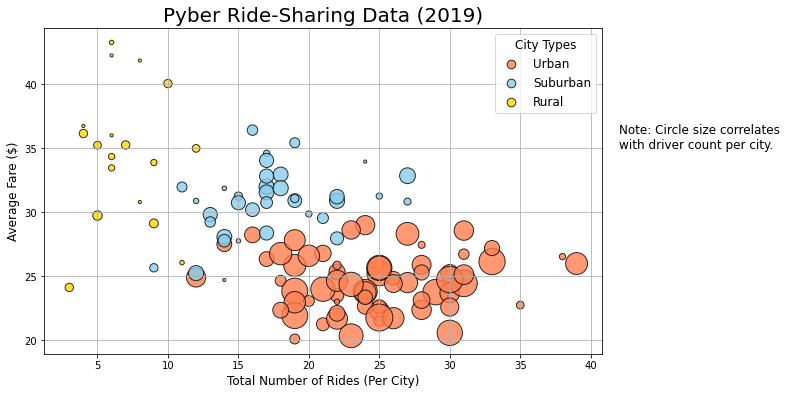

In [46]:
# Add the scatter charts for each type of city

plt.subplots(figsize = (10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "coral",
           label = "Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s = 10*suburban_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "skyblue",
           label = "Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = 10*rural_driver_count,
           edgecolors = "k", linewidth = 1,
           alpha = 0.8, c = "gold",
           label = "Rural")

#Incorporate the other graph properties

plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)

plt.ylabel("Average Fare ($)", fontsize = 12)

plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)

plt.grid(True)

# Create a legend

lgnd = plt.legend(fontsize= "12", mode="Expanded",
                 scatterpoints=1, loc="best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates\nwith driver count per city.",
        fontsize="12")

# Save the figure

plt.savefig("analysis/Fig1.png", bbox_inches = 'tight', facecolor= 'white', transparent = False)

# Show the plot

plt.show()
